In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
fft = pd.read_csv('weak_fft_7913527.csv')

# Strategy 1, where 1 MPI process per CCX, max 32 per archer node
blas1 = pd.read_csv('weak_blas_7913901.csv')

# Strategy 2, 1 MPI process per CCD, max 16 per archer node
blas2 = pd.read_csv('weak_blas_7920032.csv')

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_weak_scaling(df, title="Weak Scaling of Runtime vs. Particle Count", save_svg=False, filename="weak_scaling_plot.svg"):
    # Set global font to CMU and enable LaTeX
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = ['CMU Serif']  # Use 'CMU Serif' for the main font
    rcParams['text.usetex'] = True
    rcParams['text.latex.preamble'] = r'\renewcommand{\rmdefault}{cmu}'

    # Calculate total particles and runtimes for each experiment_id
    group_size = df.groupby('experiment_id').size()
    n_particles = group_size * df['n_points'].iloc[0]
    
    # Get maximum runtime per experiment_id
    runtimes = df.groupby('experiment_id')['runtime'].max()
    m2l_runtimes = df.groupby('experiment_id')['m2l'].max()


    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Larger size and higher DPI for quality

    # Set bar widths as a fraction of n_particles
    relative_width = 0.3
    widths = n_particles * relative_width

    # Plot bars
    ax.bar(n_particles, runtimes, width=widths, align='center', color='skyblue', edgecolor='black')

    # Set x-axis to logarithmic
    ax.set_xscale('log')

    # Labeling the axes with LaTeX expressions for testing
    ax.set_xlabel(r'Total Number of Particles', fontsize=14)
    ax.set_ylabel(r'Runtime ($ms$)', fontsize=14)
    ax.set_title(title, fontsize=16)

    # Customize ticks and grid
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

    # Save the plot as SVG if specified
    if save_svg:
        plt.savefig(filename, format="svg", bbox_inches="tight")

    plt.show()

colors = ["#87CEEB", "#FA8072", "#DAA520", "#3CB371", "#6A5ACD", "#FF7F50", "#9932CC", "#FF6347", "#40E0D0"]


def plot_weak_scaling_stacked(df, ylims=None, title="Weak Scaling of Runtime vs. Particle Count", save_svg=False, filename="weak_scaling_plot.svg"):
    # Set global font to CMU and enable LaTeX
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = ['CMU Serif']  # Use 'CMU Serif' for the main font
    rcParams['text.usetex'] = True
    rcParams['text.latex.preamble'] = r'\renewcommand{\rmdefault}{cmu}'

    # Calculate total particles and runtimes for each experiment_id
    group_size = df.groupby('experiment_id').size()
    n_particles = group_size * df['n_points'].iloc[0]
    
    # Get maximum runtime per experiment_id
    runtimes = df.groupby('experiment_id')['runtime'].max()
    m2l_runtimes = df.groupby('experiment_id')['m2l'].max()
    p2p_runtimes = df.groupby('experiment_id')['p2p'].max()
    ghost_exchange_u = df.groupby('experiment_id')['ghost_exchange_u'].max()
    ghost_exchange_v = df.groupby('experiment_id')['ghost_exchange_v'].max()
    ghost_exchange_v_runtime = df.groupby('experiment_id')['ghost_exchange_v_runtime'].max()


    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Larger size and higher DPI for quality

    # Set bar widths and offsets
    relative_width = 0.3
    widths = n_particles * relative_width
    offset = widths / 2  # Offset for second set of bars
    
    # Plot bars
    ax.bar(n_particles, m2l_runtimes, width=widths, align='center', color='skyblue', edgecolor='black', label='M2L Runtime')
    ax.bar(n_particles, p2p_runtimes, bottom=m2l_runtimes,  width=widths, align='center', color='salmon', edgecolor='black', label='P2P Runtime')
    ax.bar(n_particles, ghost_exchange_v_runtime, bottom=p2p_runtimes+m2l_runtimes, width=widths, align='center', color='slateblue', edgecolor='black', label='Ghost Exchange V Runtime')

    # Plot the second set of stacked bars (ghost_exchange_u + ghost_exchange_v)
    ax.bar(n_particles + offset, ghost_exchange_u, width=widths, align='center', color='goldenrod', edgecolor='black', label='Ghost Exchange U')
    ax.bar(n_particles + offset, ghost_exchange_v, bottom=ghost_exchange_u, width=widths, align='center', color='MediumSeaGreen', edgecolor='black', label='Ghost Exchange V')
    
    # Set x-axis to logarithmic
    ax.set_xscale('log')

    if ylims:
        ax.set_ylim(ylims)
    else:
        ax.set_ylim(0, runtimes.max()+150)

    # Labeling the axes with LaTeX expressions for testing
    ax.set_xlabel(r'Total Number of Particles', fontsize=14)
    ax.set_ylabel(r'Runtime ($ms$)', fontsize=14)
    ax.set_title(title, fontsize=16)

    # Customize ticks and grid
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

    ax.legend()
    # Save the plot as SVG if specified
    if save_svg:
        plt.savefig(filename, format="svg", bbox_inches="tight")

    plt.show()

    return ax, fig

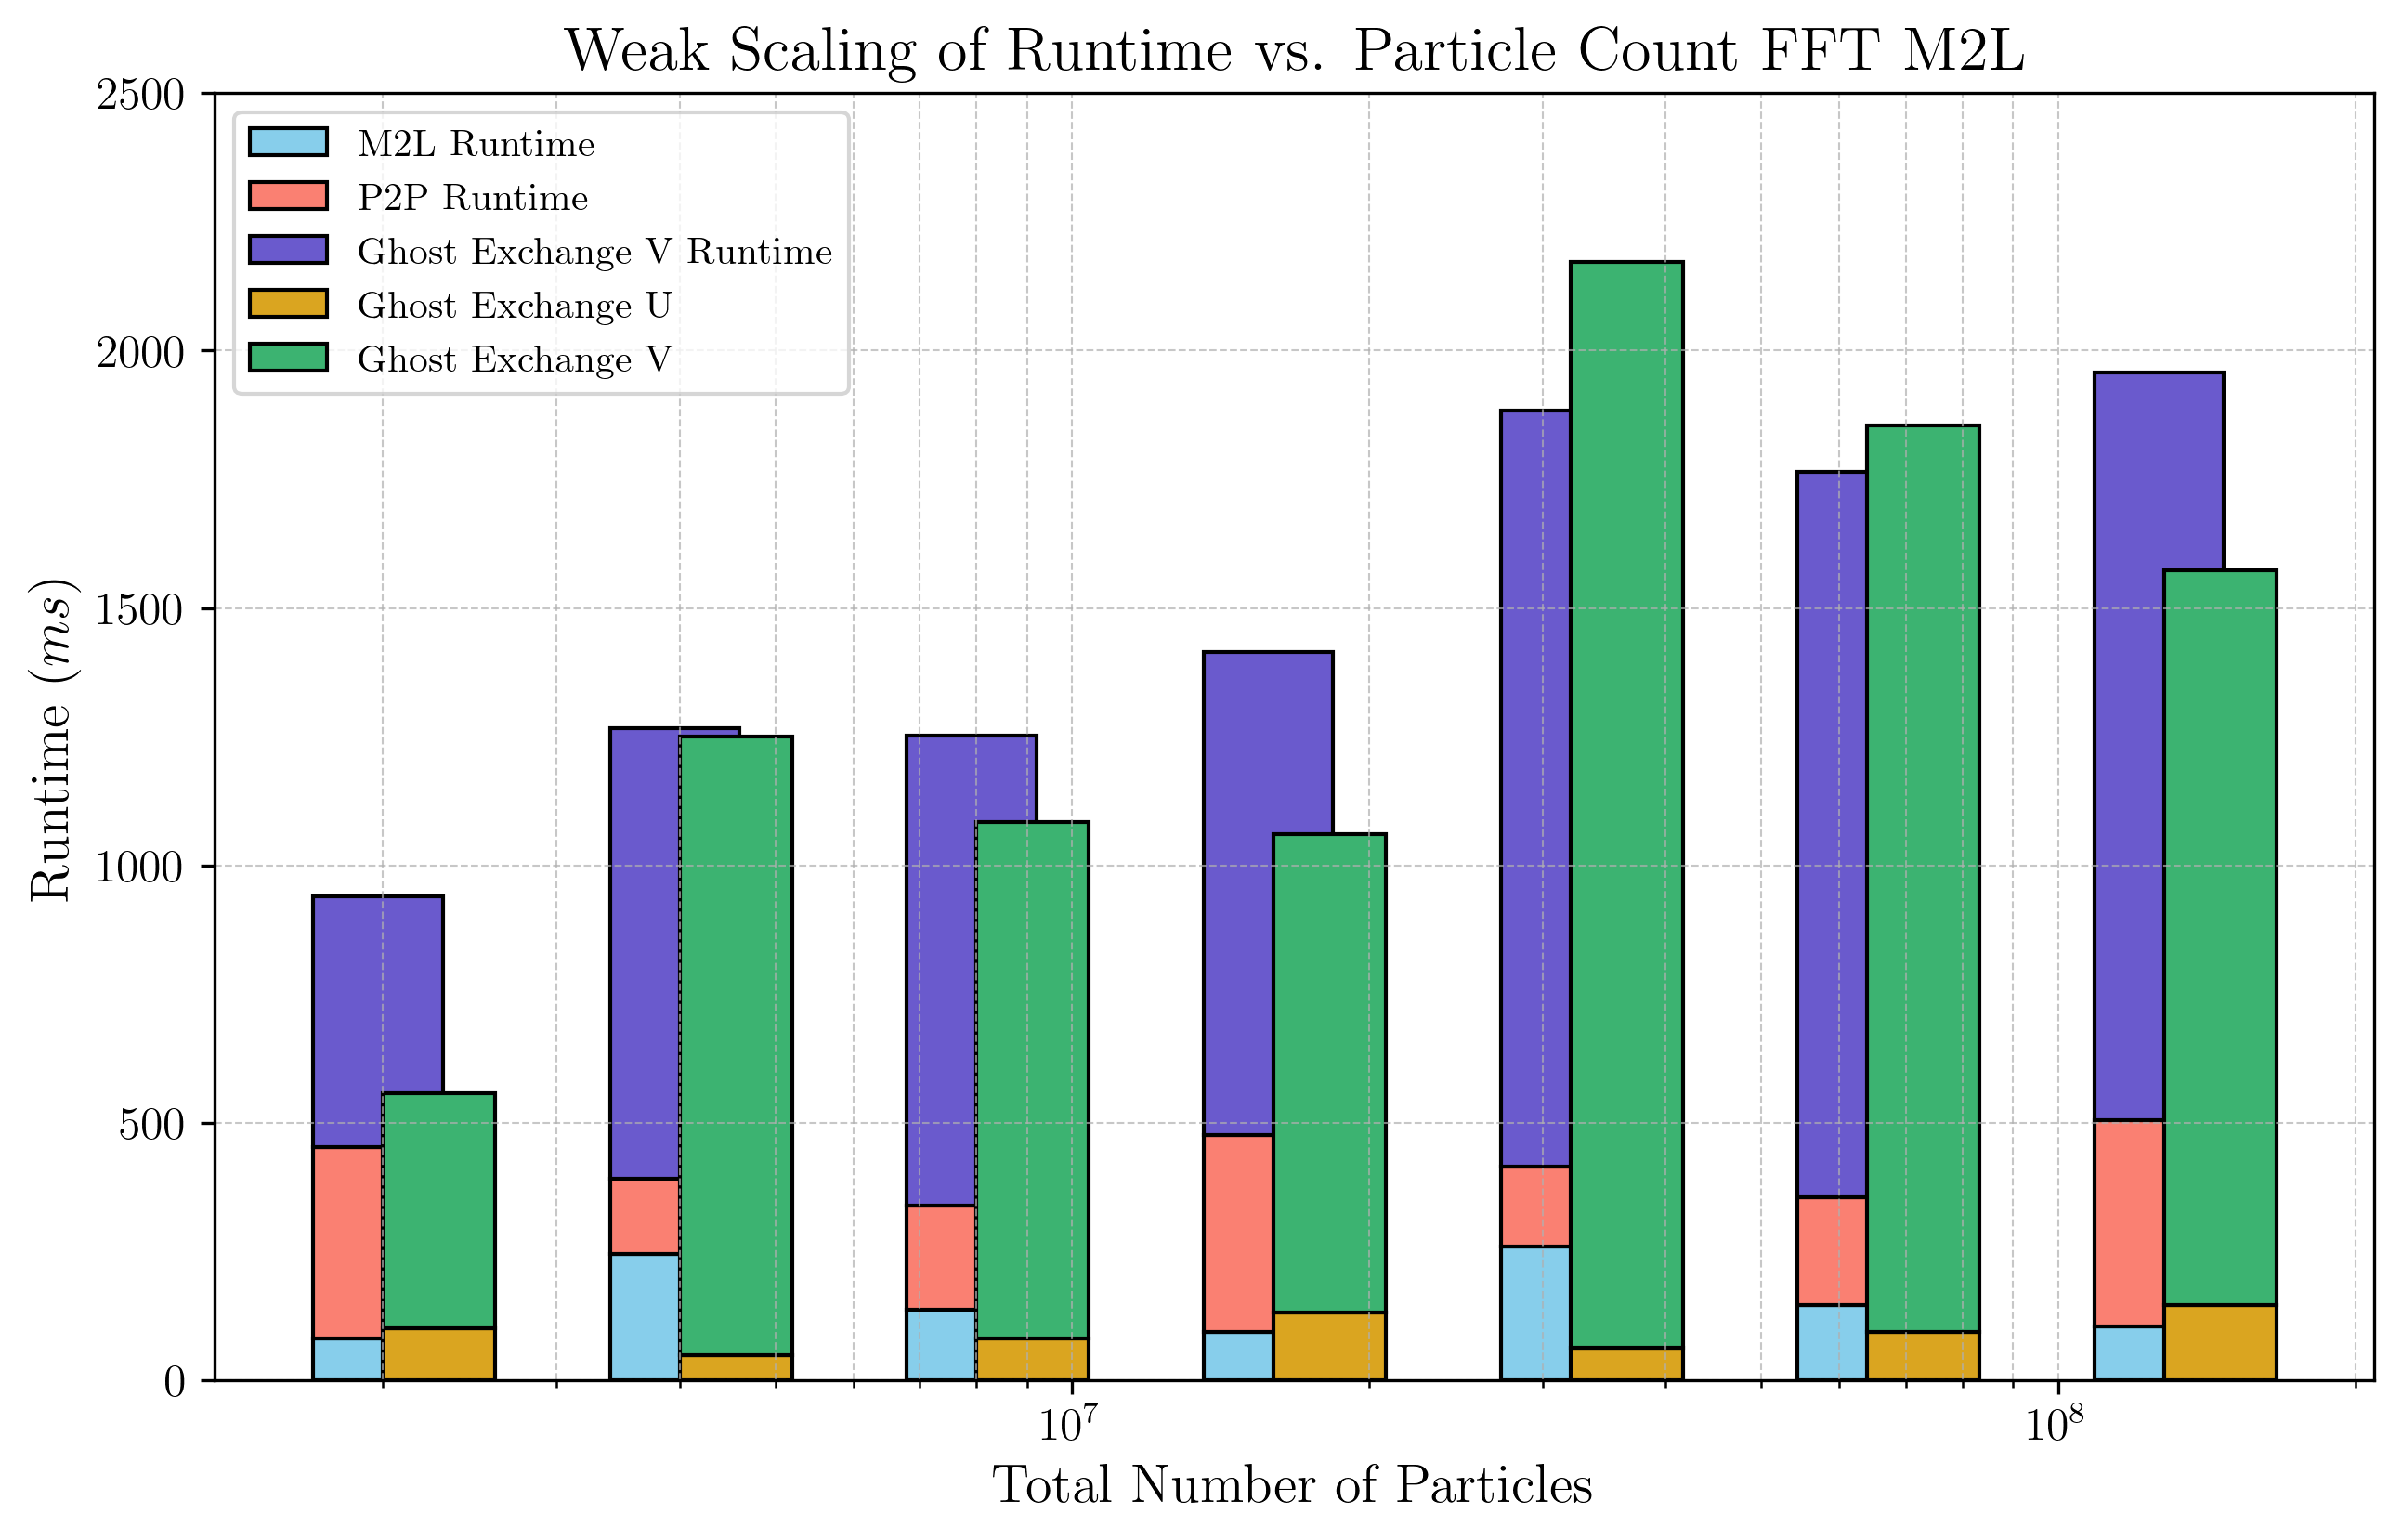

In [35]:
ax1, fig1 = plot_weak_scaling_stacked(blas1, ylims=(0, 2500), title="Weak Scaling of Runtime vs. Particle Count FFT M2L")

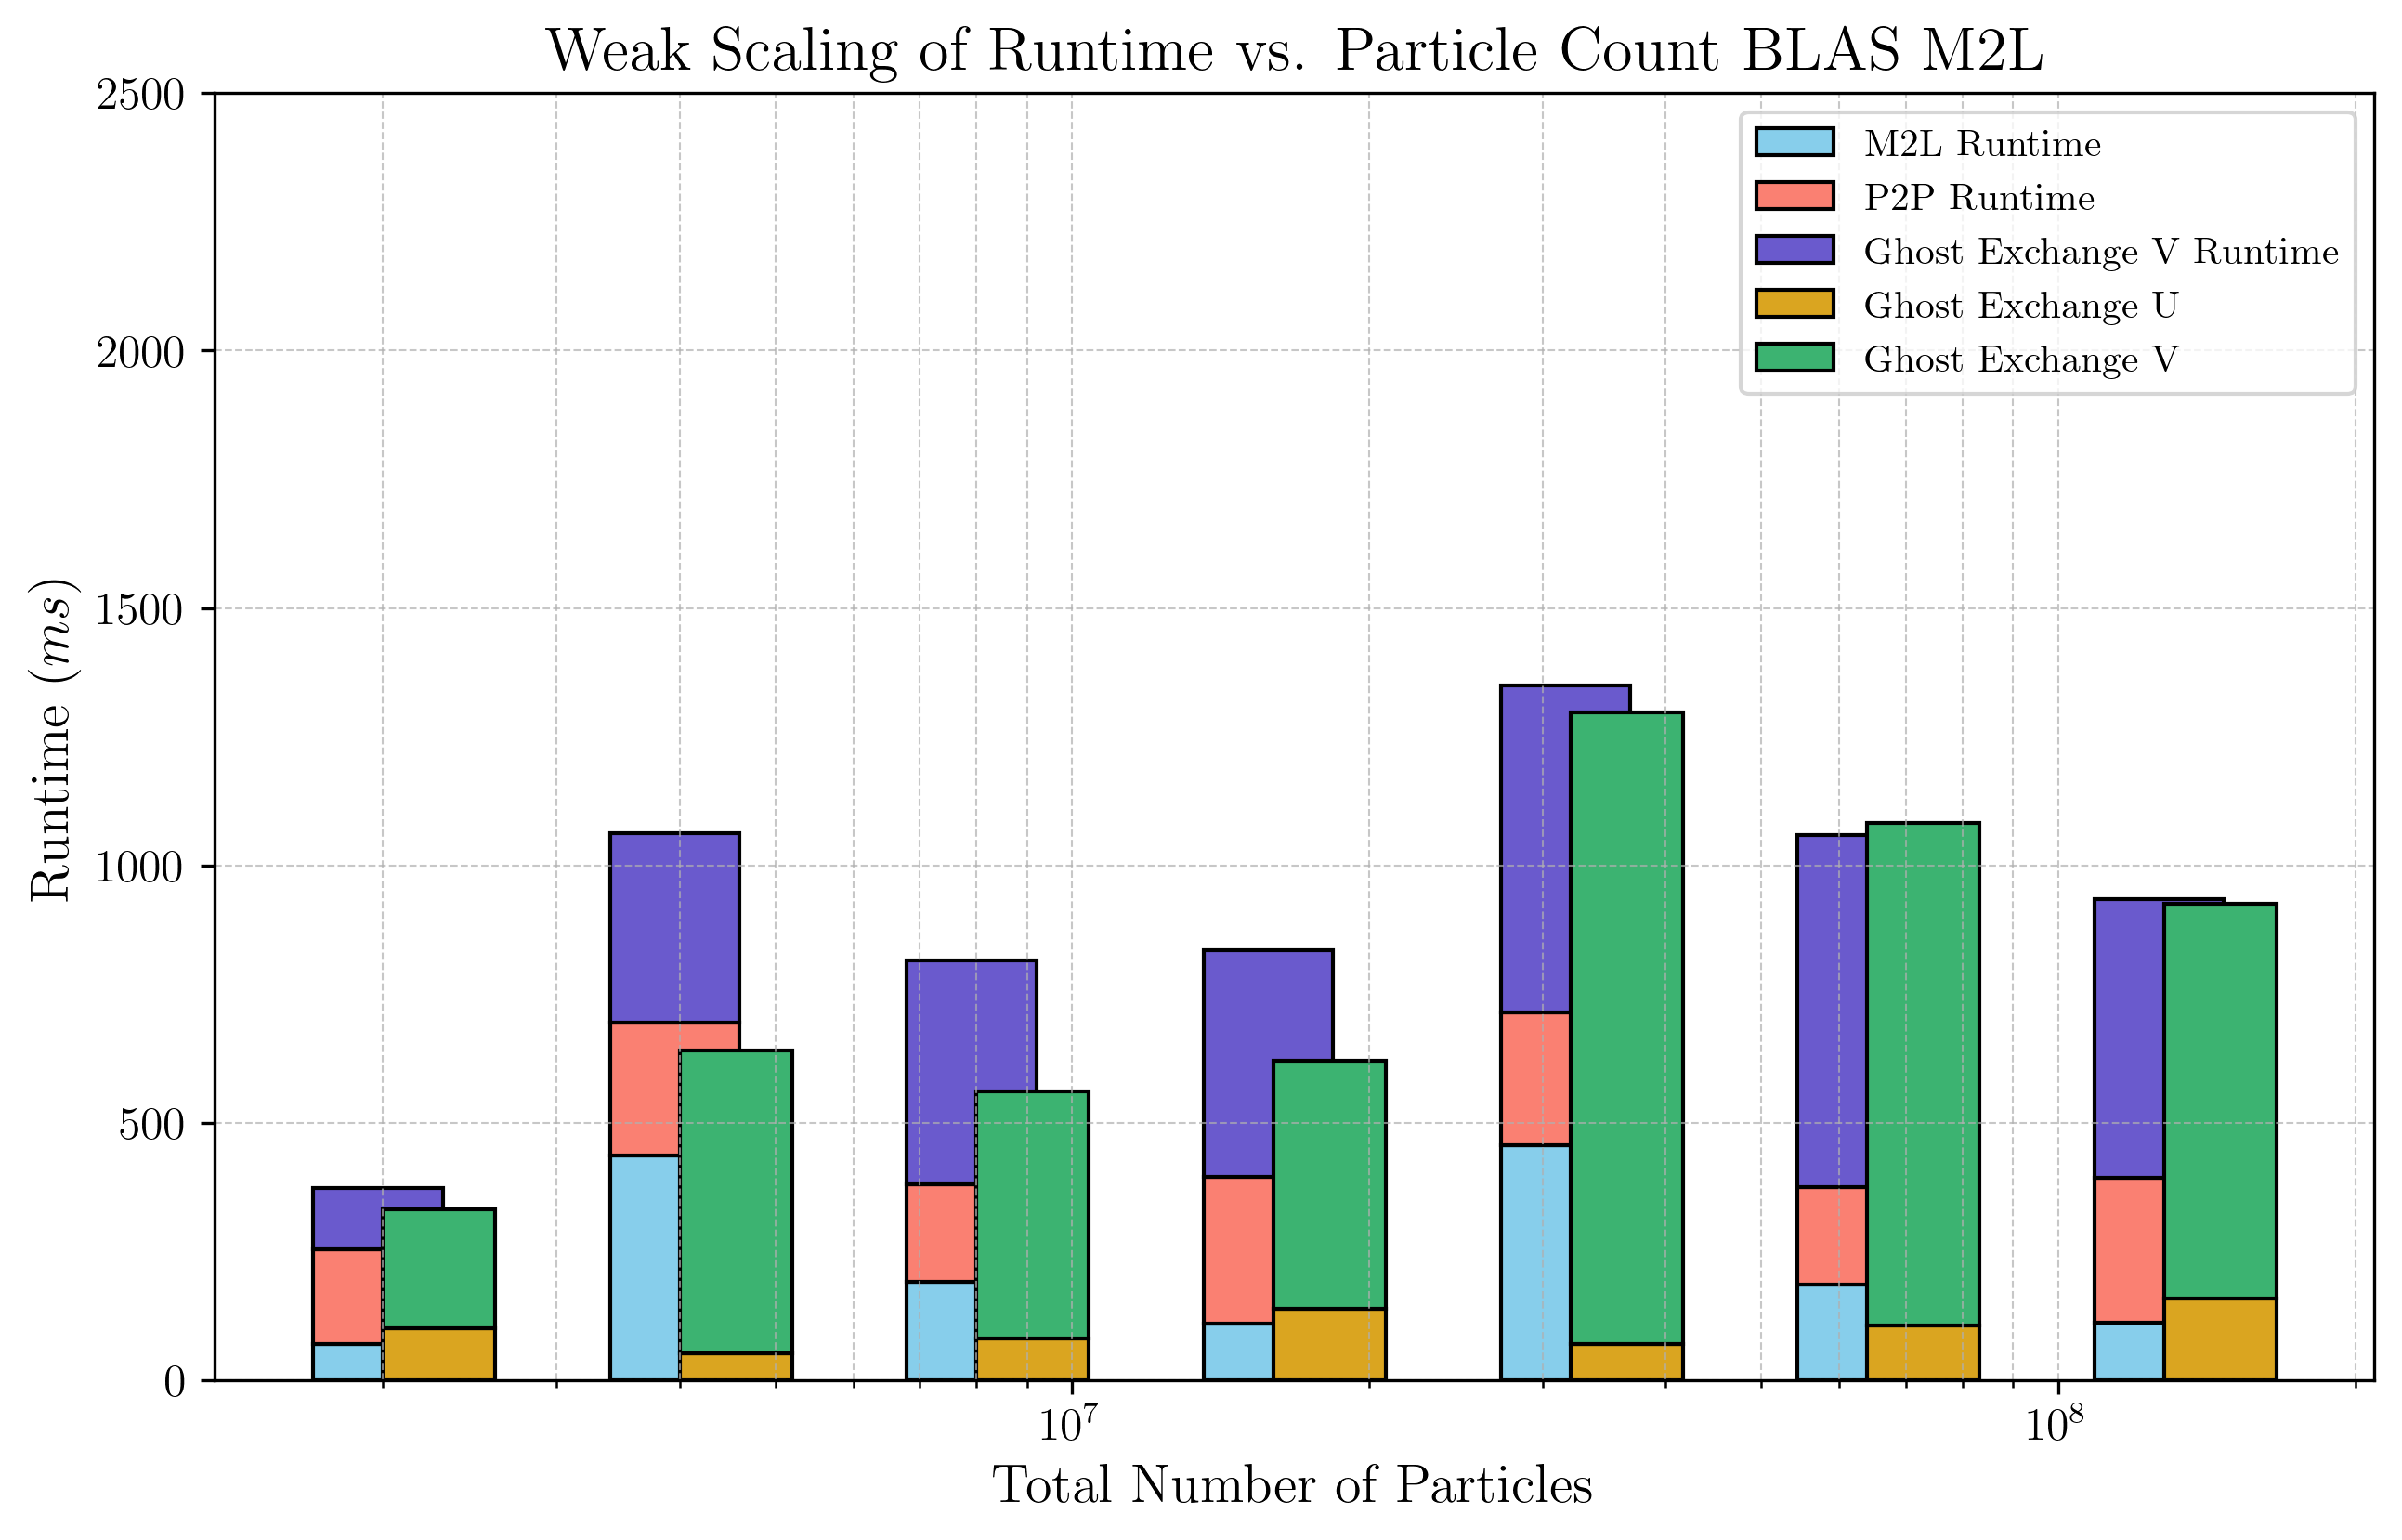

In [36]:
ax2, fig2 = plot_weak_scaling_stacked(blas2, ylims=(0, 2500), title="Weak Scaling of Runtime vs. Particle Count BLAS M2L")

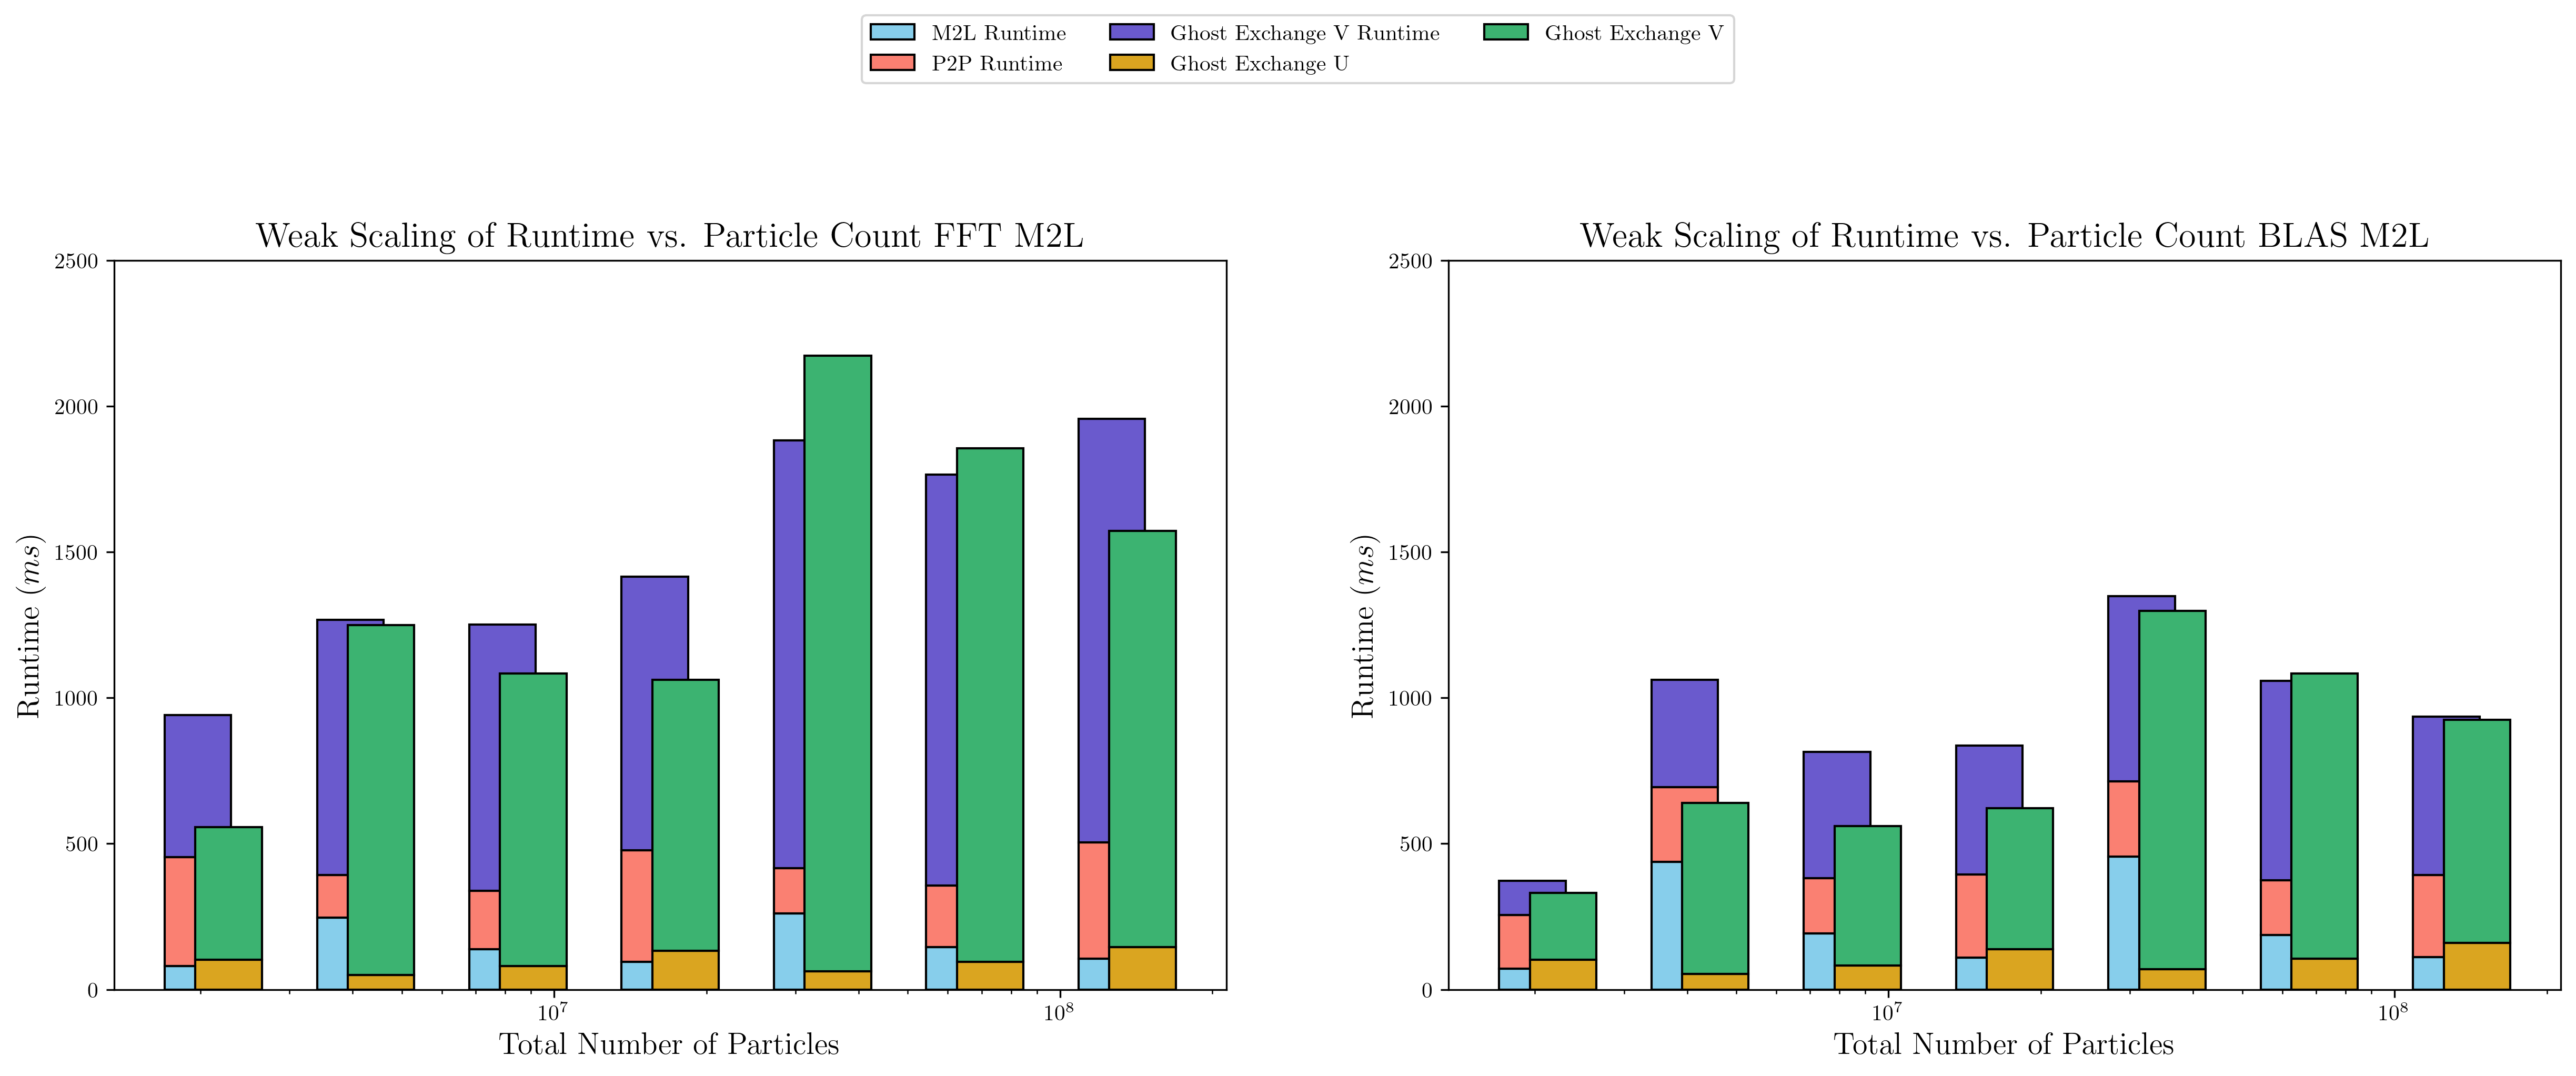

In [42]:
# Create a new combined figure
combined_fig, (combined_ax1, combined_ax2) = plt.subplots(1, 2, figsize=(20, 6), dpi=300)

# Track unique labels to prevent duplicates
unique_labels = set()

# Set lims
ylims = (0, 2500)

# Transfer bar data from ax1 to combined_ax1 with relative widths
for container in ax1.containers:
    bars = container.get_children()
    x_values = [bar.get_x() + bar.get_width() / 2 for bar in bars]
    heights = [bar.get_height() for bar in bars]
    bottoms = [bar.get_y() for bar in bars]
    color = bars[0].get_facecolor() if bars else None
    widths = [x * 0.3 for x in x_values]
    
    # Only add label if it hasn't been added before
    label = container.get_label()
    for x, height, bottom, width in zip(x_values, heights, bottoms, widths):
        combined_ax1.bar(x, height, bottom=bottom, width=width, color=color, edgecolor='black', label=label if label not in unique_labels else "")
        unique_labels.add(label)  # Add label to set to prevent duplicates

# Set labels and titles for combined_ax1
combined_ax1.set_xscale('log')
combined_ax1.set_xlabel(ax1.get_xlabel(), fontsize=14)
combined_ax1.set_ylabel(ax1.get_ylabel(), fontsize=14)
combined_ax1.set_title(ax1.get_title(), fontsize=16)
combined_ax1.set_ylim(ylims)

# Repeat for combined_ax2 with unique labels
for container in ax2.containers:
    bars = container.get_children()
    x_values = [bar.get_x() + bar.get_width() / 2 for bar in bars]
    heights = [bar.get_height() for bar in bars]
    bottoms = [bar.get_y() for bar in bars]
    color = bars[0].get_facecolor() if bars else None
    widths = [x * 0.3 for x in x_values]
    
    label = container.get_label()
    for x, height, bottom, width in zip(x_values, heights, bottoms, widths):
        combined_ax2.bar(x, height, bottom=bottom, width=width, color=color, edgecolor='black', label=label if label not in unique_labels else "")
        unique_labels.add(label)

# Set labels and titles for combined_ax1
combined_ax2.set_xscale('log')
combined_ax2.set_xlabel(ax2.get_xlabel(), fontsize=14)
combined_ax2.set_ylabel(ax2.get_ylabel(), fontsize=14)
combined_ax2.set_title(ax2.get_title(), fontsize=16)
combined_ax2.set_ylim(ylims)

# Combine legend entries from both axes without duplicates
handles, labels = [], []
for handle, label in zip(*combined_ax1.get_legend_handles_labels()):
    if label not in labels:
        handles.append(handle)
        labels.append(label)

# Create a single legend for the figure
combined_fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

# Show the combined figure
plt.show()